In [1]:
import pandas as pd
import os
import json
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
from scipy import stats,signal
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
import random
import re
import csv
from IPython.display import HTML, display, Image
import tabulate
import math as m
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/cbclab/Dropbox/postdocUPF/jatos_experiments')
import my_functions as myf

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 1
#mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 1
#mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fday = [1,2,3,4,5,6,7,8,9,10]
fsession = [1,2]
session_labels = ['Th','Fr','Sa','Su','Mo','Tu','We','Th','Fr','Sa']

SR_color = {'mood': [0.1,0.5,1],'food': [1,0.5,0.1],'sleep': 'y', 'real_stress':[0.1,0.5,0.2]}
PV_color = {'DO':[1,0,0.4],'SO':[0.4,0,1],'NO':'k'}
PV_line = {'DO':'-','SO':'-','NO':'-'}

key_SR = ['mood','food','sleep', 'real_stress']
key_PV = ['Dsubj_optout_oo','Ssubj_optout_oo','subj_perf_no','OKubj_RT_no','DoverConf','SoverConf','risk_av']
key_name = key_SR+key_PV

pair_keys_SR = list(itertools.combinations(key_SR, 2))
key_SR = ['mood','food','sleep', 'real_stress']
key_SR2plot = [key_SR[:int(len(key_SR)/2)],key_SR[int(len(key_SR)/2):]]

# pair of PV 
pair_keys_PV = list(itertools.combinations(key_PV[:-3], 2))
pair_keys_PV2plot = [pair_keys_PV[:int(len(pair_keys_PV)/2)],pair_keys_PV[int(len(pair_keys_PV)/2):]]
key_name_PV = {'Dsubj_optout_oo':'DO','Ssubj_optout_oo':'SO','subj_perf_no':'acc NO','OKubj_RT_no':'RT NO'}
pair_key_name_PV2plot = [[[key_name_PV[k] for k in tupl] for tupl in lista] for lista in pair_keys_PV2plot]

pair_SR_PV,pair_SR_PV2plot = [],[]
for pv in key_PV:
    aux = []
    for sr in key_SR:
        pair_SR_PV.append((sr,pv))
        aux.append((sr,pv))
    pair_SR_PV2plot.append(aux)

key_diff = ['Dperf_oo', 'Sperf_oo', 'perf_no', 'Dn_trials_oo', 'Sn_trials_oo', 'NOn_trials', \
            'DRT_OKoo', 'SRT_OKoo', 'RT_no', 'RT_noNOK', 'Doptout', 'Soptout']

unique_signals_dots = [1,2,3,4]
unique_signals_gabor = [1,2,3]

main_path = '/home/cbclab/Dropbox/postdocUPF/jatos_experiments'

path_results_dots = main_path + '/dots/notebooks/results_tanda_1/'
path_results_gabor = main_path + '/gabor/notebooks/results_tanda_1/'

In [2]:
file=path_results_dots+'mean_across_participants.json'
with open(file) as f:
    as_dots = json.load(f)
file=path_results_dots+'se_across_participants.json'
with open(file) as f:
    se_dots = json.load(f)

In [3]:
file=path_results_gabor+'mean_across_participants.json'
with open(file) as f:
    as_gabor = json.load(f)
file=path_results_gabor+'se_across_participants.json'
with open(file) as f:
    se_gabor = json.load(f)

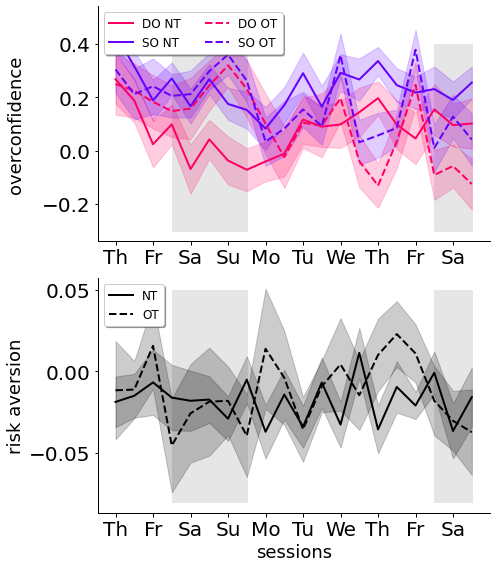

In [9]:
fig, ax = plt.subplots(2,figsize=(7,8))
plt.subplots_adjust(hspace = 0.4)  

# DOTS
ax[0].fill_between([4,8], -0.3,0.4,color=[0.9,0.9,0.9])
ax[0].fill_between([18,20], -0.3, 0.4,color=[0.9,0.9,0.9])
ax[0].plot(np.arange(1,len(as_dots[key_PV[4]])+1),as_dots[key_PV[4]],c=[1,0,0.4], zorder=2)
ax[0].fill_between(np.arange(1,len(as_dots[key_PV[4]])+1),np.array(as_dots[key_PV[4]])-np.array(se_dots[key_PV[4]]),\
                   np.array(as_dots[key_PV[4]])+np.array(se_dots[key_PV[4]]), color=[1,0,0.4], alpha=0.2)
ax[0].plot(np.arange(1,len(as_dots[key_PV[5]])+1),as_dots[key_PV[5]],c=[0.4,0,1], zorder=2)
ax[0].fill_between(np.arange(1,len(as_dots[key_PV[5]])+1),np.array(as_dots[key_PV[5]])-np.array(se_dots[key_PV[5]]),\
                   np.array(as_dots[key_PV[5]])+np.array(se_dots[key_PV[5]]), color=[0.4,0,1], alpha=0.2)

ax[1].fill_between([4,8], -0.08, 0.05,color=[0.9,0.9,0.9])
ax[1].fill_between([18,20], -0.08, 0.05,color=[0.9,0.9,0.9])
ax[1].plot(np.arange(1,len(as_dots[key_PV[6]])+1),as_dots[key_PV[6]],c='k', zorder=2)
ax[1].fill_between(np.arange(1,len(as_dots[key_PV[6]])+1),np.array(as_dots[key_PV[6]])-np.array(se_dots[key_PV[6]]),\
                   np.array(as_dots[key_PV[6]])+np.array(se_dots[key_PV[6]]), color='k', alpha=0.2)

# GABOR
ax[0].plot(np.arange(1,len(as_gabor[key_PV[4]])+1),as_gabor[key_PV[4]],c=[1,0,0.4], zorder=2,ls='--')
ax[0].fill_between(np.arange(1,len(as_gabor[key_PV[4]])+1),np.array(as_gabor[key_PV[4]])-np.array(se_gabor[key_PV[4]]),\
                   np.array(as_gabor[key_PV[4]])+np.array(se_gabor[key_PV[4]]), color=[1,0,0.4], alpha=0.2)
ax[0].plot(np.arange(1,len(as_gabor[key_PV[5]])+1),as_gabor[key_PV[5]],c=[0.4,0,1], zorder=2,ls='--')
ax[0].fill_between(np.arange(1,len(as_gabor[key_PV[5]])+1),np.array(as_gabor[key_PV[5]])-np.array(se_gabor[key_PV[5]]),\
                   np.array(as_gabor[key_PV[5]])+np.array(se_gabor[key_PV[5]]), color=[0.4,0,1], alpha=0.2)

ax[1].plot(np.arange(1,len(as_gabor[key_PV[6]])+1),as_gabor[key_PV[6]],c='k', zorder=2,ls='--')
ax[1].fill_between(np.arange(1,len(as_gabor[key_PV[6]])+1),np.array(as_gabor[key_PV[6]])-np.array(se_gabor[key_PV[6]]),\
                   np.array(as_gabor[key_PV[6]])+np.array(se_gabor[key_PV[6]]), color='k', alpha=0.2)

ax[0].set_ylabel('overconfidence')
ax[1].set_ylabel('risk aversion')
ax[1].set_xlabel('sessions')
  
ax[0].legend(("DO NT","SO NT","DO OT","SO OT"),\
             loc='upper left', shadow=True,fontsize=12,ncol=2)
ax[1].legend(("NT","OT"),\
             loc='upper left', shadow=True,fontsize=12)

for i in range(2):
    ax[i].set_xticks(np.arange(1,20,2))
    ax[i].set_xticklabels(session_labels)
    
fig.align_ylabels(ax[:])

plt.tight_layout()
plt.savefig('figS3_mean_overC&ra_dots.png')
plt.show()

In [6]:
file=path_results_dots+'ACC_PV.json'
with open(file) as f:
    ACC_PV_dots = json.load(f)

In [7]:
file=path_results_gabor+'ACC_PV.json'
with open(file) as f:
    ACC_PV_gabor = json.load(f)

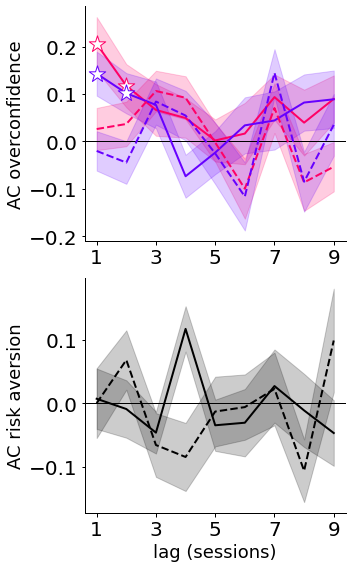

In [10]:
fig, ax = plt.subplots(2,figsize=(5,8))
plt.subplots_adjust(hspace = 0.4)  

for i in range(2):
    ax[i].axhline(0.0,c='k',lw=1)
    ax[i].set_xticks([1,3,5,7,9]) 
    
# DOTS
for j in range(1,len(ACC_PV_dots[key_PV[6]]['mean'])+1):
    if ACC_PV_dots[key_PV[6]]['pgranger'][j-1]<0.05:
        ax[1].scatter(j,ACC_PV_dots[key_PV[6]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['NO'], zorder=3)
ax[1].plot(np.arange(1,len(ACC_PV_dots[key_PV[6]]['mean'])+1),ACC_PV_dots[key_PV[6]]['mean'],c=PV_color['NO'], \
           zorder=2,label="numerosity task")
ax[1].fill_between(np.arange(1,len(ACC_PV_dots[key_PV[6]]['mean'])+1),np.array(ACC_PV_dots[key_PV[6]]['mean'])\
                    -np.array(ACC_PV_dots[key_PV[6]]['se']),np.array(ACC_PV_dots[key_PV[6]]['mean'])\
                    +np.array(ACC_PV_dots[key_PV[6]]['se']), color=PV_color['NO'], alpha=0.2)
    
for j in range(1,len(ACC_PV_dots[key_PV[4]]['mean'])+1):
    if ACC_PV_dots[key_PV[4]]['pgranger'][j-1]<0.05:
        ax[0].scatter(j,ACC_PV_dots[key_PV[4]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['DO'], zorder=3)
ax[0].plot(np.arange(1,len(ACC_PV_dots[key_PV[4]]['mean'])+1),ACC_PV_dots[key_PV[4]]['mean'],c=PV_color['DO'],label='Deterministic', zorder=2)
ax[0].fill_between(np.arange(1,len(ACC_PV_dots[key_PV[4]]['mean'])+1),np.array(ACC_PV_dots[key_PV[4]]['mean'])\
                    -np.array(ACC_PV_dots[key_PV[4]]['se']),np.array(ACC_PV_dots[key_PV[4]]['mean'])
                    +np.array(ACC_PV_dots[key_PV[4]]['se']), color=PV_color['DO'], alpha=0.2)

for j in range(1,len(ACC_PV_dots[key_PV[5]]['mean'])+1):
    if ACC_PV_dots[key_PV[5]]['pgranger'][j-1]<0.05:
        ax[0].scatter(j,ACC_PV_dots[key_PV[5]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['SO'], zorder=3)
ax[0].plot(np.arange(1,len(ACC_PV_dots[key_PV[5]]['mean'])+1),ACC_PV_dots[key_PV[5]]['mean'],c=PV_color['SO'],label='Stochastic', zorder=2)
ax[0].fill_between(np.arange(1,len(ACC_PV_dots[key_PV[5]]['mean'])+1),np.array(ACC_PV_dots[key_PV[5]]['mean'])\
                    -np.array(ACC_PV_dots[key_PV[5]]['se']),np.array(ACC_PV_dots[key_PV[5]]['mean'])\
                    +np.array(ACC_PV_dots[key_PV[5]]['se']), color=PV_color['SO'], alpha=0.2)

# GABOR
for j in range(1,len(ACC_PV_gabor[key_PV[6]]['mean'])+1):
    if ACC_PV_gabor[key_PV[6]]['pgranger'][j-1]<0.05:
        ax[1].scatter(j,ACC_PV_gabor[key_PV[6]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['NO'], zorder=3)
ax[1].plot(np.arange(1,len(ACC_PV_gabor[key_PV[6]]['mean'])+1),ACC_PV_gabor[key_PV[6]]['mean'],c=PV_color['NO'],\
           zorder=2,ls='--',label="orientation task")
ax[1].fill_between(np.arange(1,len(ACC_PV_gabor[key_PV[6]]['mean'])+1),np.array(ACC_PV_gabor[key_PV[6]]['mean'])\
                    -np.array(ACC_PV_gabor[key_PV[6]]['se']),np.array(ACC_PV_gabor[key_PV[6]]['mean'])\
                    +np.array(ACC_PV_gabor[key_PV[6]]['se']), color=PV_color['NO'], alpha=0.2)
    
for j in range(1,len(ACC_PV_gabor[key_PV[4]]['mean'])+1):
    if ACC_PV_gabor[key_PV[4]]['pgranger'][j-1]<0.05:
        ax[0].scatter(j,ACC_PV_gabor[key_PV[4]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['DO'], zorder=3)
ax[0].plot(np.arange(1,len(ACC_PV_gabor[key_PV[4]]['mean'])+1),ACC_PV_gabor[key_PV[4]]['mean'],c=PV_color['DO'],\
           label='Deterministic', zorder=2,ls='--')
ax[0].fill_between(np.arange(1,len(ACC_PV_gabor[key_PV[4]]['mean'])+1),np.array(ACC_PV_gabor[key_PV[4]]['mean'])\
                    -np.array(ACC_PV_gabor[key_PV[4]]['se']),np.array(ACC_PV_gabor[key_PV[4]]['mean'])
                    +np.array(ACC_PV_gabor[key_PV[4]]['se']), color=PV_color['DO'], alpha=0.2)

for j in range(1,len(ACC_PV_gabor[key_PV[5]]['mean'])+1):
    if ACC_PV_gabor[key_PV[5]]['pgranger'][j-1]<0.05:
        ax[0].scatter(j,ACC_PV_gabor[key_PV[5]]['mean'][j-1],marker='*',s=300,c='#ffffff',edgecolors=PV_color['SO'], zorder=3)
ax[0].plot(np.arange(1,len(ACC_PV_gabor[key_PV[5]]['mean'])+1),ACC_PV_gabor[key_PV[5]]['mean'],c=PV_color['SO'],\
           label='Stochastic', zorder=2,ls='--')
ax[0].fill_between(np.arange(1,len(ACC_PV_gabor[key_PV[5]]['mean'])+1),np.array(ACC_PV_gabor[key_PV[5]]['mean'])\
                    -np.array(ACC_PV_gabor[key_PV[5]]['se']),np.array(ACC_PV_gabor[key_PV[5]]['mean'])\
                    +np.array(ACC_PV_gabor[key_PV[5]]['se']), color=PV_color['SO'], alpha=0.2)

ax[0].set_ylabel('AC overconfidence')
ax[1].set_ylabel('AC risk aversion')
ax[1].set_xlabel('lag (sessions)')
#ax[1].legend(loc='upper right', shadow=True,fontsize=12)

fig.align_ylabels(ax[:])

plt.tight_layout()
plt.savefig('figS3_ACC_over&ra_dots.png')
plt.show()